Step 1: Load necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [ ]:
pip install opendatasets

Step 2: Load the dataset

In [ ]:
import opendatasets as od

od.download(
"https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iftikhararefin
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india


100%|██████████| 72.9M/72.9M [00:05<00:00, 14.9MB/s]


In [ ]:
df = pd.read_csv('/content/air-quality-data-in-india/city_day.csv')

In [ ]:
print(df.shape)

(29531, 16)


In [ ]:
print(df.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
print(df.describe())

                                Date         PM2.5          PM10  \
count                          29531  24933.000000  18391.000000   
mean   2018-05-14 05:40:15.807118080     67.450578    118.127103   
min              2015-01-01 00:00:00      0.040000      0.010000   
25%              2017-04-16 00:00:00     28.820000     56.255000   
50%              2018-08-05 00:00:00     48.570000     95.680000   
75%              2019-09-03 00:00:00     80.590000    149.745000   
max              2020-07-01 00:00:00    949.990000   1000.000000   
std                              NaN     64.661449     90.605110   

                 NO           NO2           NOx           NH3            CO  \
count  25949.000000  25946.000000  25346.000000  19203.000000  27472.000000   
mean      17.574730     28.560659     32.309123     23.483476      2.248598   
min        0.020000      0.010000      0.000000      0.010000      0.000000   
25%        5.630000     11.750000     12.820000      8.580000      0.51

In [ ]:
print(df['City'].value_counts())

City
Ahmedabad             2009
Bengaluru             2009
Chennai               2009
Mumbai                2009
Lucknow               2009
Delhi                 2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: count, dtype: int64


In [ ]:
print(df['AQI_Bucket'].value_counts())

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64


# **Data Visualize**

## **Bar chart of City Coverage Area**

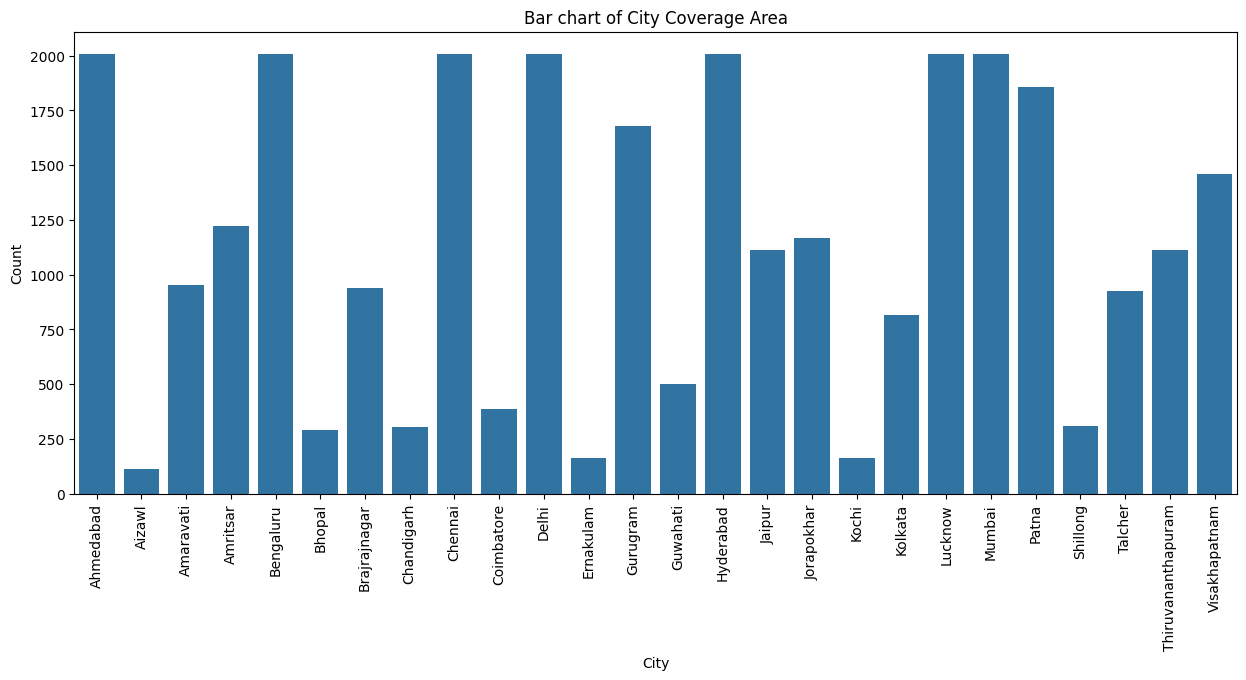

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='City', data=df)
plt.xticks(rotation=90)
plt.title('Bar chart of City Coverage Area')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


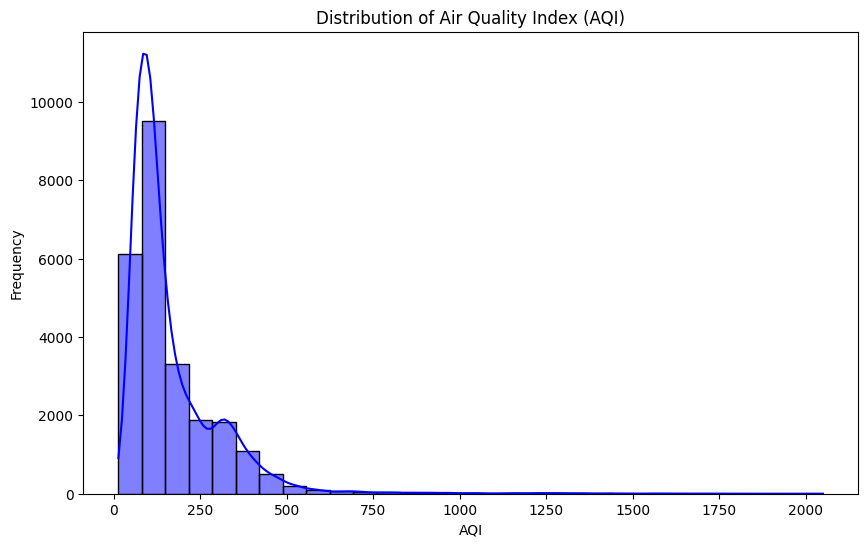

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

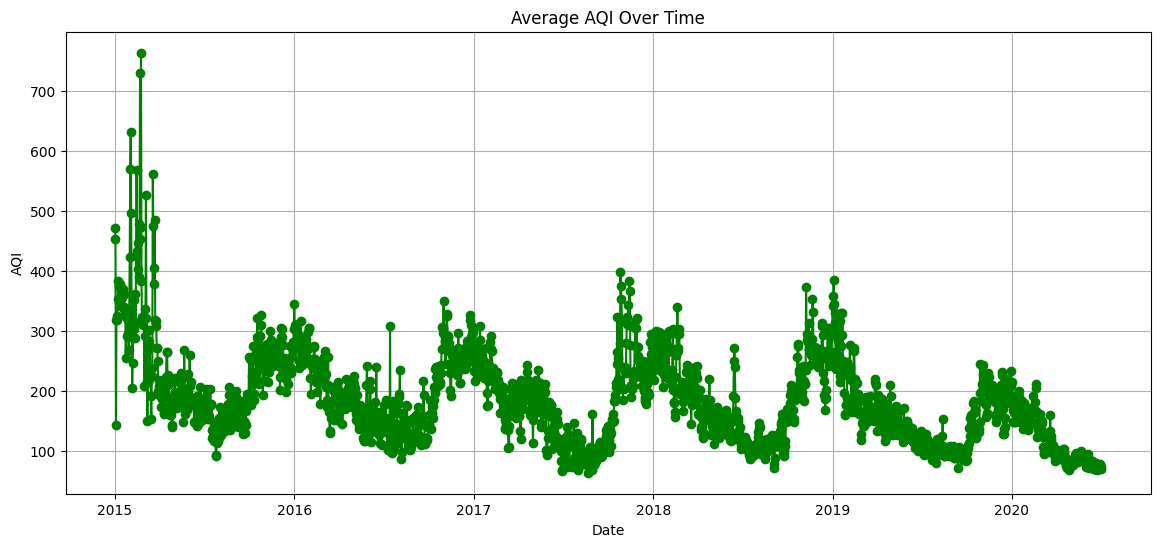

In [ ]:
daily_aqi = df.groupby('Date')['AQI'].mean()


plt.figure(figsize=(14, 6))
plt.plot(daily_aqi.index, daily_aqi.values, marker='o', linestyle='-', color='green')
plt.title('Average AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# **Missing Data Heatmap:**

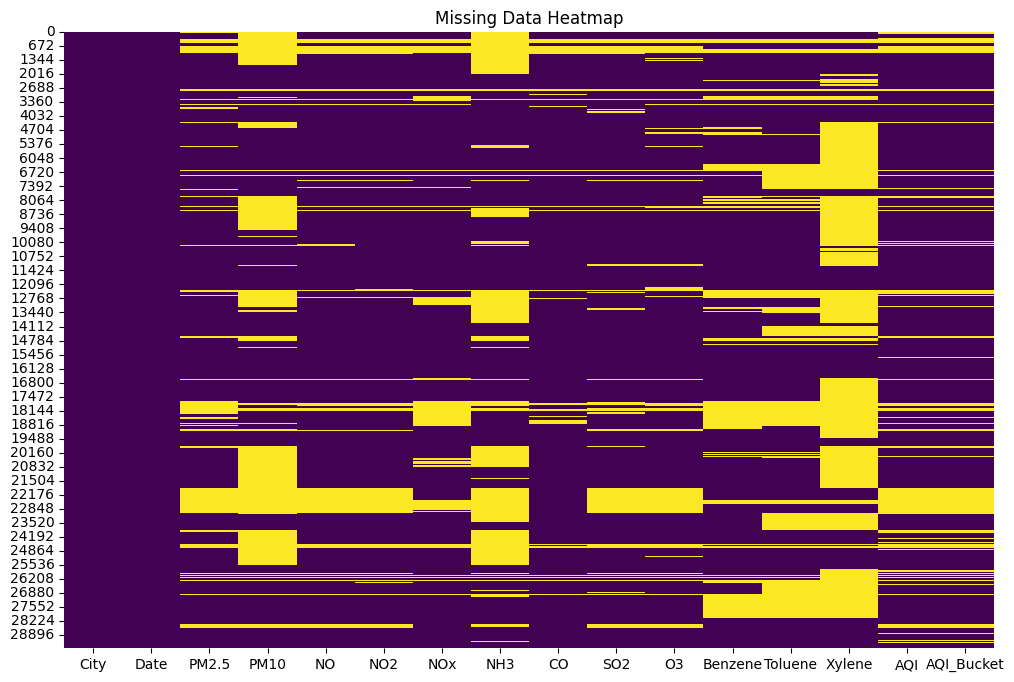

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


# **Boxplots for Outlier Detection:**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

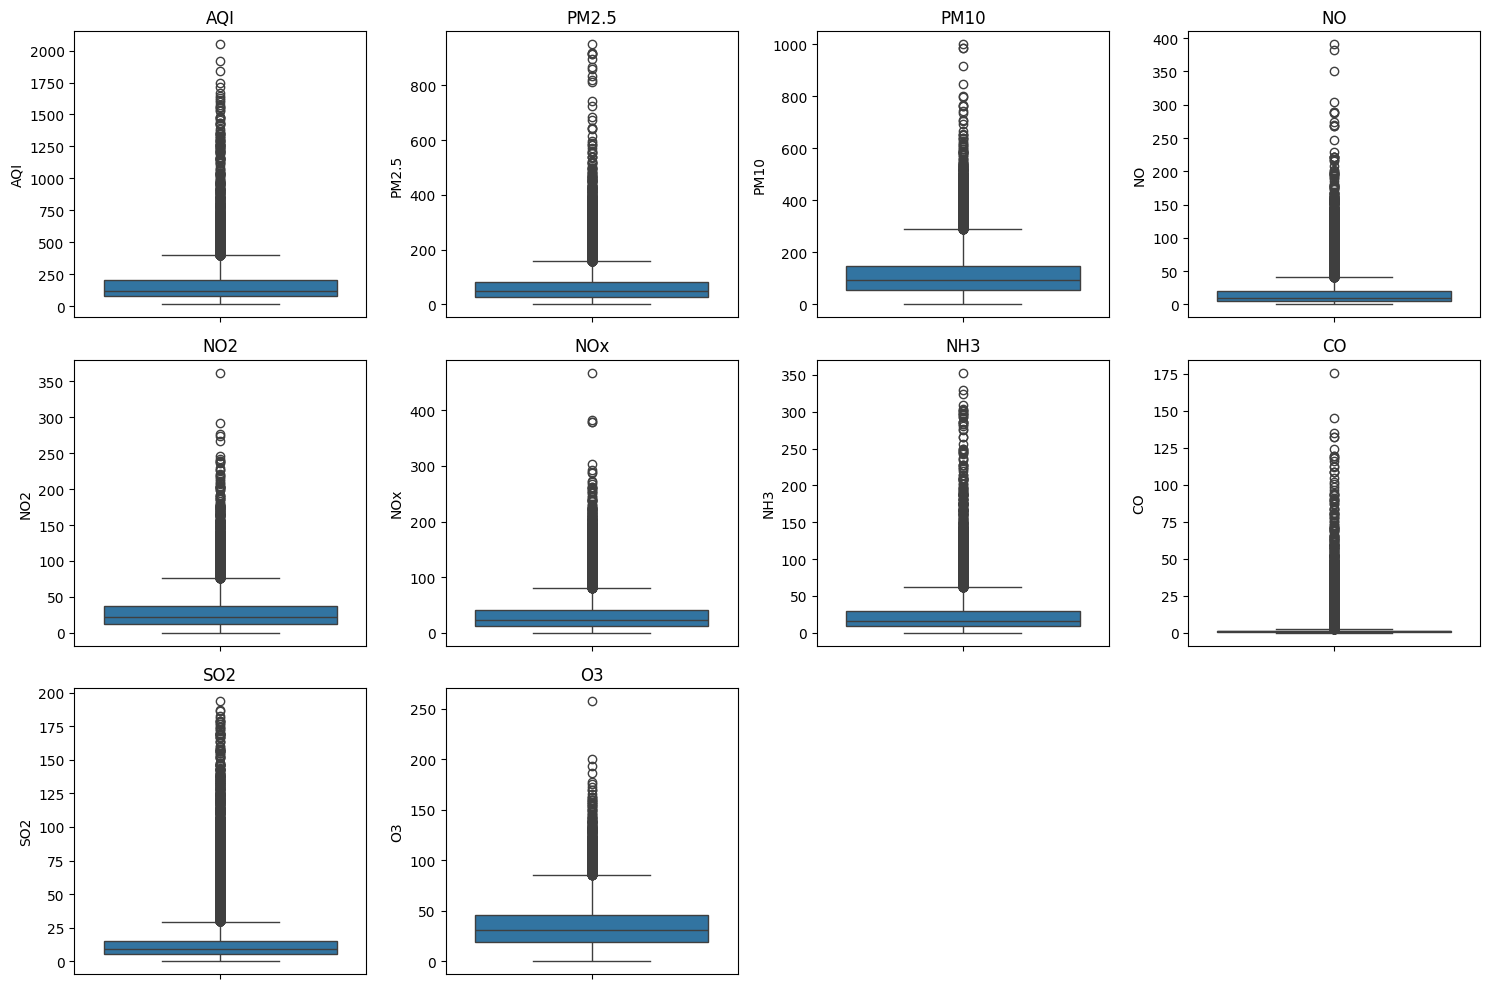

In [ ]:
numerical_features = ['AQI', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(y=df[feature])
  plt.title(feature)
plt.tight_layout()
plt.show()


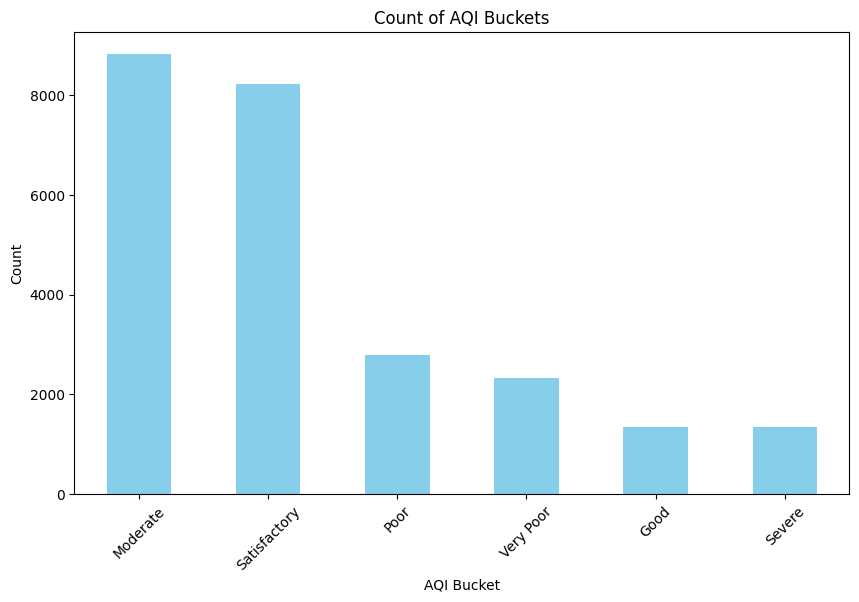

In [ ]:
aqi_buckets_count = df['AQI_Bucket'].value_counts()
plt.figure(figsize=(10, 6))
aqi_buckets_count.plot(kind='bar', color='skyblue')
plt.title('Count of AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

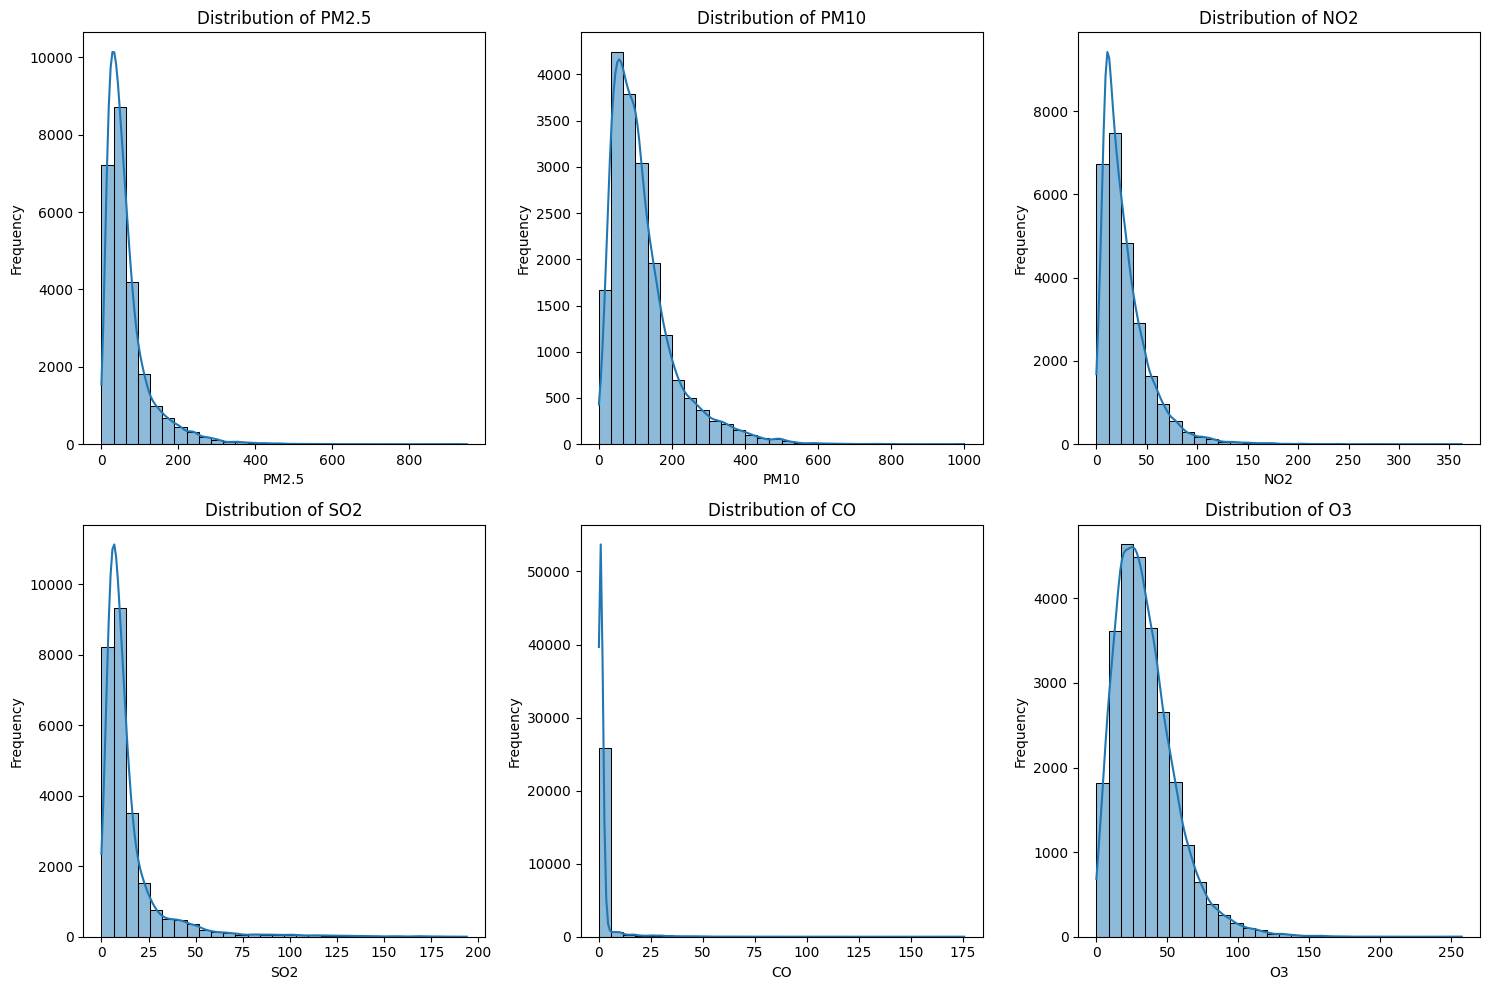

In [ ]:
# Key pollutants: PM2.5, PM10, NO2, SO2, CO, O3
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants):
  plt.subplot(2, 3, i + 1)
  sns.histplot(df[pollutant], kde=True, bins=30)
  plt.title(f'Distribution of {pollutant}')
  plt.xlabel(pollutant)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


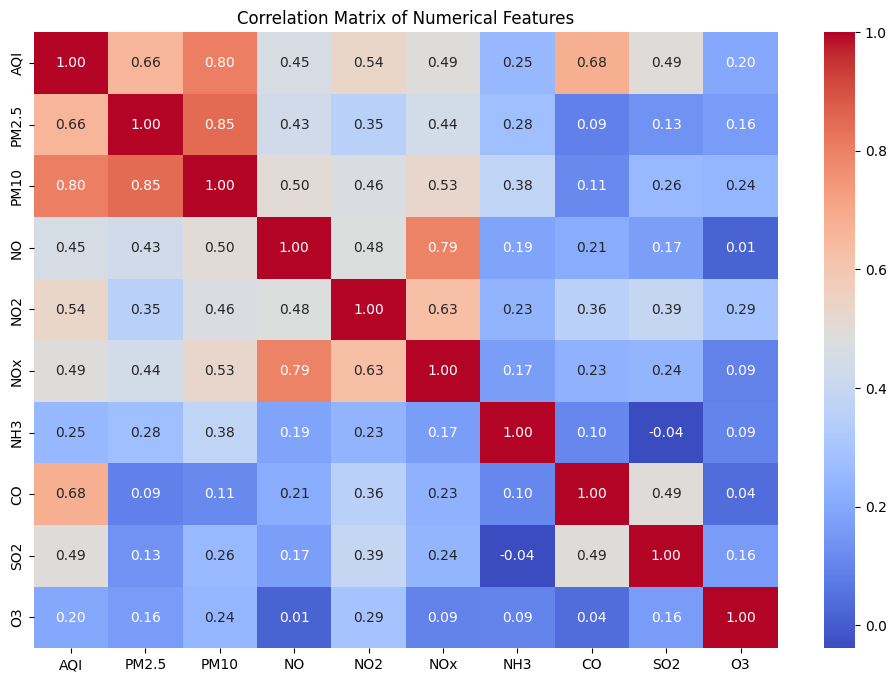

In [ ]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


DAILY AQI INDEX

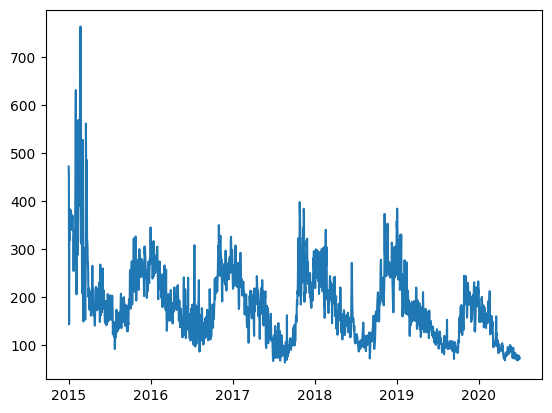

In [ ]:
daily_aqi = df.groupby('Date')['AQI'].mean()
plt.plot(daily_aqi.index, daily_aqi.values)


# **Vehicular Pollutants**

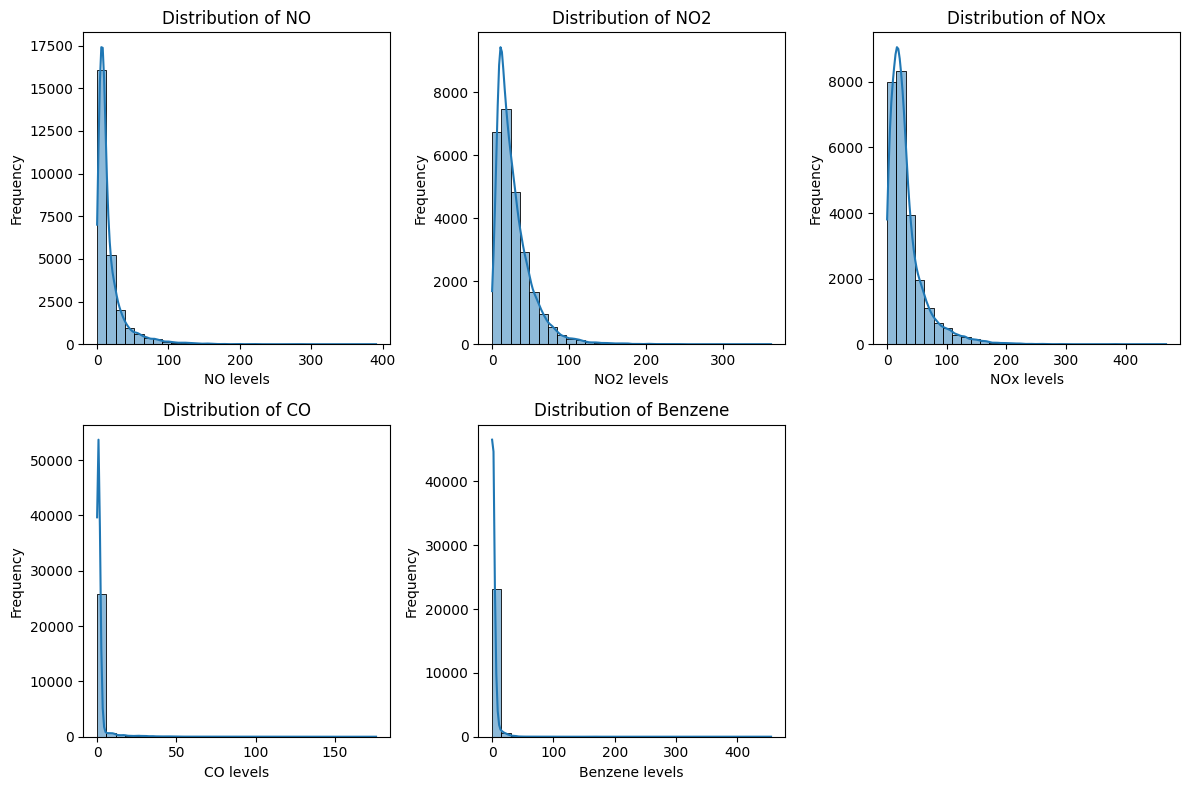

In [ ]:
vehicular_pollutants = ['NO', 'NO2', 'NOx', 'CO', 'Benzene']

plt.figure(figsize=(12, 8))
for i, pollutant in enumerate(vehicular_pollutants):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[pollutant].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(f'{pollutant} levels')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-24-c64bdb00bc37>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities_vehicular['Vehicular_Pollution_Score'], y=top_10_cities_vehicular.index, palette='Reds_r')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_

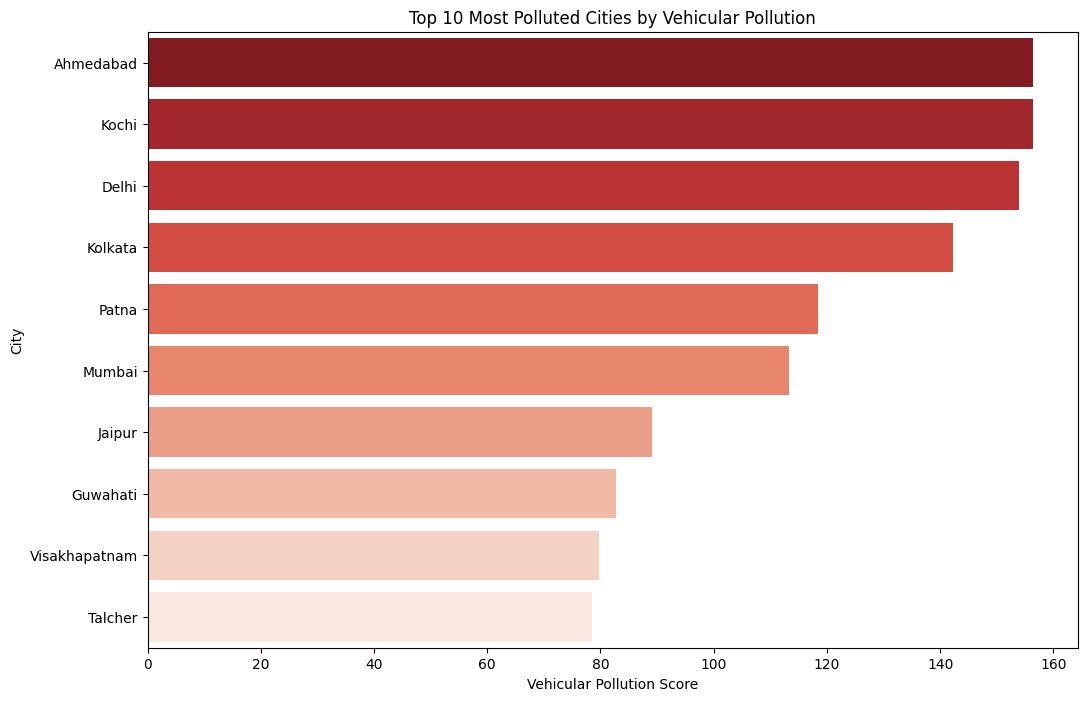

In [ ]:
city_pollution_vehicular = df.groupby('City')[vehicular_pollutants].mean()
city_pollution_vehicular['Vehicular_Pollution_Score'] = city_pollution_vehicular.sum(axis=1)
most_polluted_cities_vehicular = city_pollution_vehicular.sort_values(by='Vehicular_Pollution_Score', ascending=False)
top_10_cities_vehicular = most_polluted_cities_vehicular.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cities_vehicular['Vehicular_Pollution_Score'], y=top_10_cities_vehicular.index, palette='Reds_r')
plt.xlabel('Vehicular Pollution Score')
plt.ylabel('City')
plt.title('Top 10 Most Polluted Cities by Vehicular Pollution')
plt.show()

# **Industrial Pollutants**

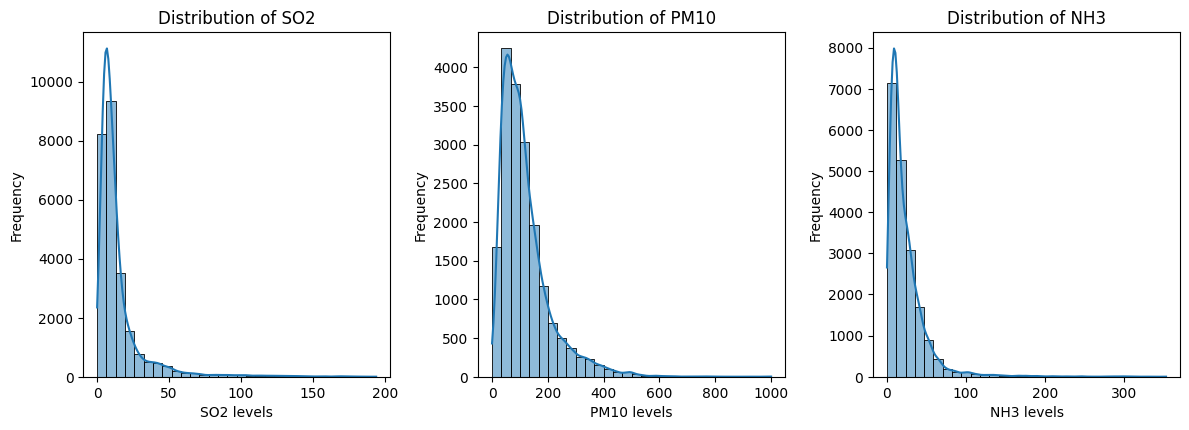

In [ ]:
industrial_pollutants = ['SO2', 'PM10', 'NH3']

plt.figure(figsize=(12, 8))
for i, pollutant in enumerate(industrial_pollutants):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[pollutant].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(f'{pollutant} levels')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Most Polutated City For Industrial Content**

<ipython-input-26-a8ab25502bf7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_polluted_cities.head(10)['Industrial_Pollution_Score'], y=most_polluted_cities.head(10).index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-pack

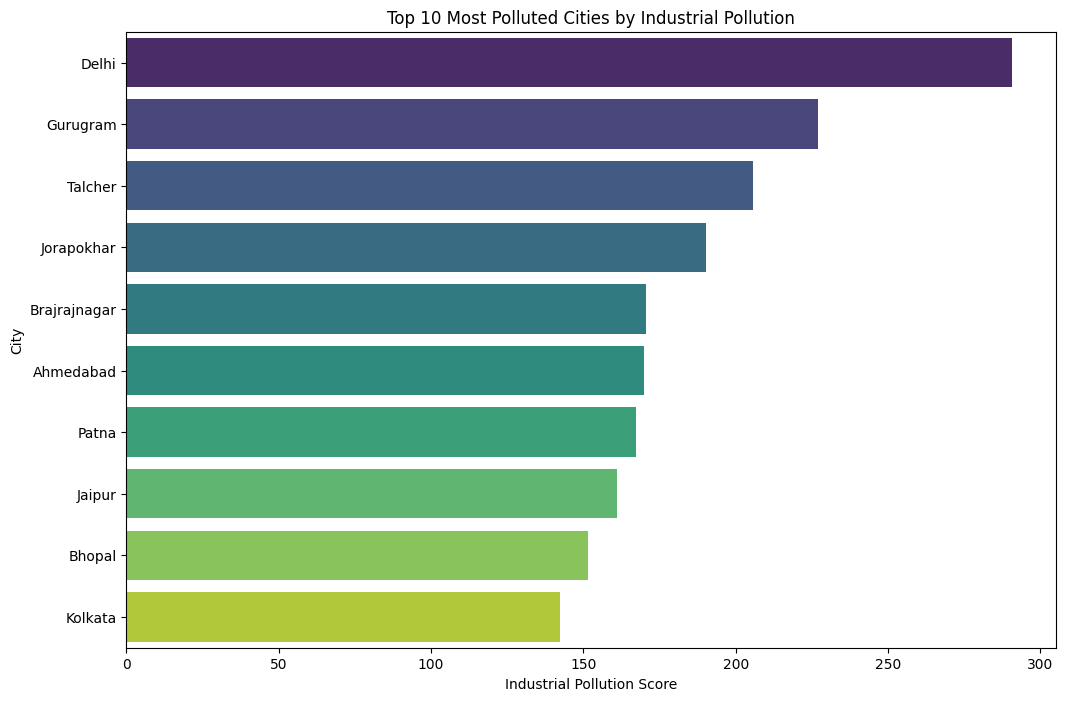

In [ ]:
city_pollution = df.groupby('City')[industrial_pollutants].mean()

city_pollution['Industrial_Pollution_Score'] = city_pollution.sum(axis=1)

most_polluted_cities = city_pollution.sort_values(by='Industrial_Pollution_Score', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=most_polluted_cities.head(10)['Industrial_Pollution_Score'], y=most_polluted_cities.head(10).index, palette='viridis')
plt.xlabel('Industrial Pollution Score')
plt.ylabel('City')
plt.title('Top 10 Most Polluted Cities by Industrial Pollution')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(df.head())

        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [ ]:
df = df.dropna()

**Feature Selection**

In [ ]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
X = df[features]
y = df['AQI_Bucket']

**Standardize the features**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Encode the target variable**

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
print(df.describe())

                                Date        PM2.5         PM10           NO  \
count                           6236  6236.000000  6236.000000  6236.000000   
mean   2018-11-09 22:01:32.366902016    61.327365   123.418321    17.015191   
min              2015-01-01 00:00:00     2.000000     7.800000     0.250000   
25%              2018-01-27 00:00:00    27.927500    66.970000     5.080000   
50%              2019-03-12 00:00:00    47.490000   103.010000    10.060000   
75%              2019-12-21 06:00:00    73.442500   150.770000    19.392500   
max              2020-07-01 00:00:00   639.190000   796.880000   159.220000   
std                              NaN    53.709682    85.791491    20.037836   

               NO2          NOx          NH3           CO          SO2  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     31.708190    32.448956    20.737070     0.984344    11.514426   
min       0.170000     0.170000     0.120000     0.000000     0.71

**Split the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

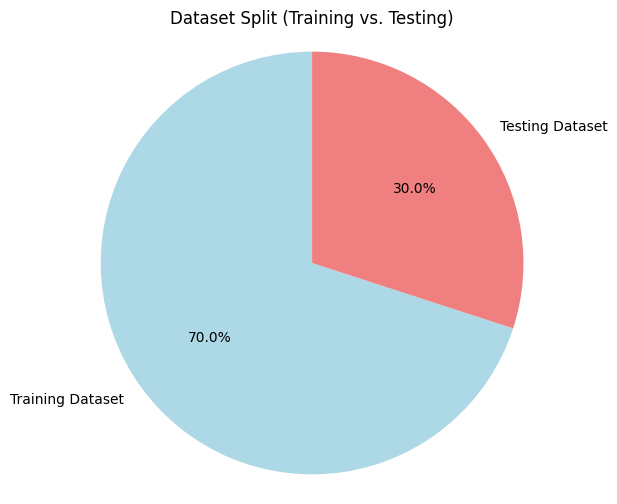

In [ ]:
import matplotlib.pyplot as plt

train_size = len(X_train)
test_size = len(X_test)
total_size = train_size + test_size

sizes = [train_size, test_size]
labels = ['Training Dataset', 'Testing Dataset']
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Dataset Split (Training vs. Testing)')
plt.axis('equal')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Support Vector Machine (SVM)**

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
training_time_svm = end_time - start_time

In [ ]:
start_pred_time = time.time()
y_train_pred_svm = svm_model.predict(X_train)
end_pred_time = time.time()
prediction_time_svm_train = end_pred_time - start_pred_time

accuracy_svm_train = accuracy_score(y_train, y_train_pred_svm)
precision_svm_train, recall_svm_train, f1_score_svm_train, _ = precision_recall_fscore_support(y_train, y_train_pred_svm, average='weighted', zero_division=0)

In [ ]:
start_pred_time = time.time()
y_test_pred_svm = svm_model.predict(X_test)
end_pred_time = time.time()
prediction_time_svm_test = end_pred_time - start_pred_time

accuracy_svm_test = accuracy_score(y_test, y_test_pred_svm)
precision_svm_test, recall_svm_test, f1_score_svm_test, _ = precision_recall_fscore_support(y_test, y_test_pred_svm, average='weighted', zero_division=0)

In [ ]:
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71       132
           1       0.84      0.86      0.85       767
           2       0.75      0.63      0.68       187
           3       0.81      0.83      0.82       618
           4       0.90      0.74      0.81        47
           5       0.78      0.87      0.82       120

    accuracy                           0.81      1871
   macro avg       0.81      0.77      0.78      1871
weighted avg       0.81      0.81      0.81      1871



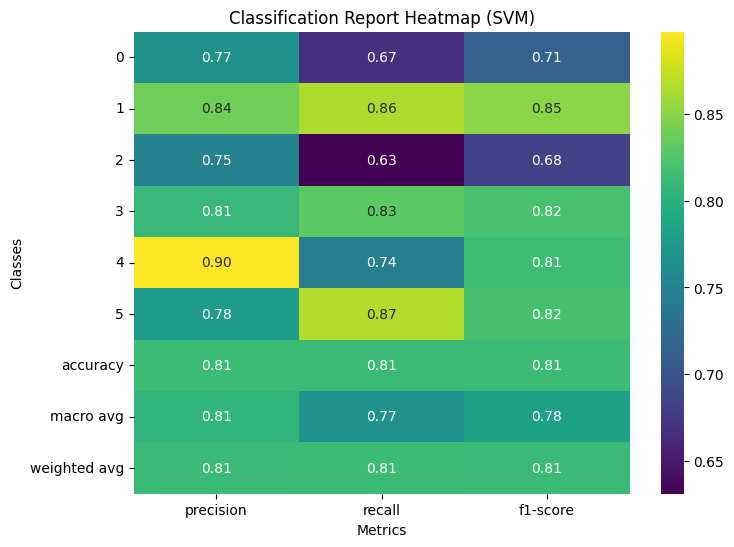

In [ ]:

from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

report = classification_report(y_test, y_test_pred_svm, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report Heatmap (SVM)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


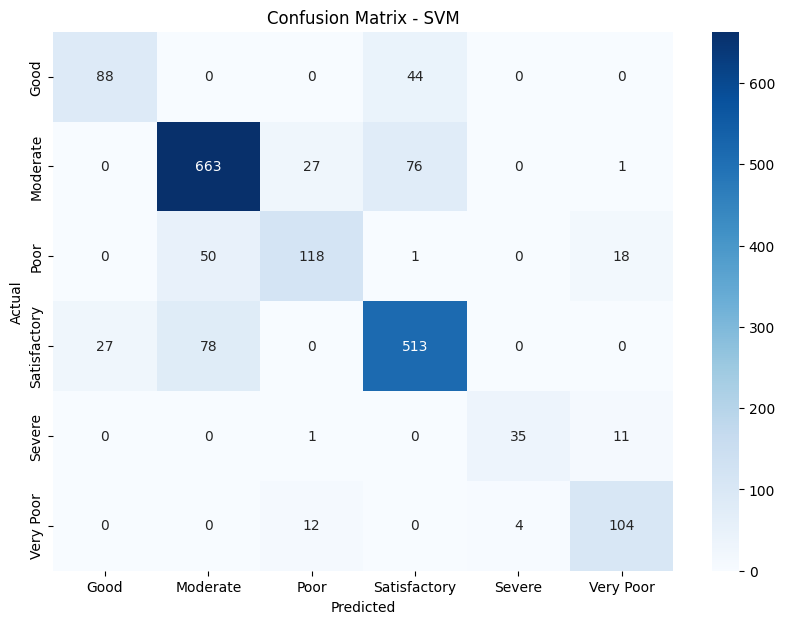

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
print(f"SVM (Training) - Accuracy: {accuracy_svm_train:.4f}, Precision: {precision_svm_train:.4f}, Recall: {recall_svm_train:.4f}, F1-score: {f1_score_svm_train:.4f}, Training Time: {training_time_svm:.4f} seconds, Prediction Time: {prediction_time_svm_train:.4f} seconds")
print(f"SVM (Testing) - Accuracy: {accuracy_svm_test:.4f}, Precision: {precision_svm_test:.4f}, Recall: {recall_svm_test:.4f}, F1-score: {f1_score_svm_test:.4f}, Prediction Time: {prediction_time_svm_test:.4f} seconds")

SVM (Training) - Accuracy: 0.8167, Precision: 0.8166, Recall: 0.8167, F1-score: 0.8165, Training Time: 1.7485 seconds, Prediction Time: 1.1995 seconds
SVM (Testing) - Accuracy: 0.8129, Precision: 0.8118, Recall: 0.8129, F1-score: 0.8112, Prediction Time: 0.4619 seconds


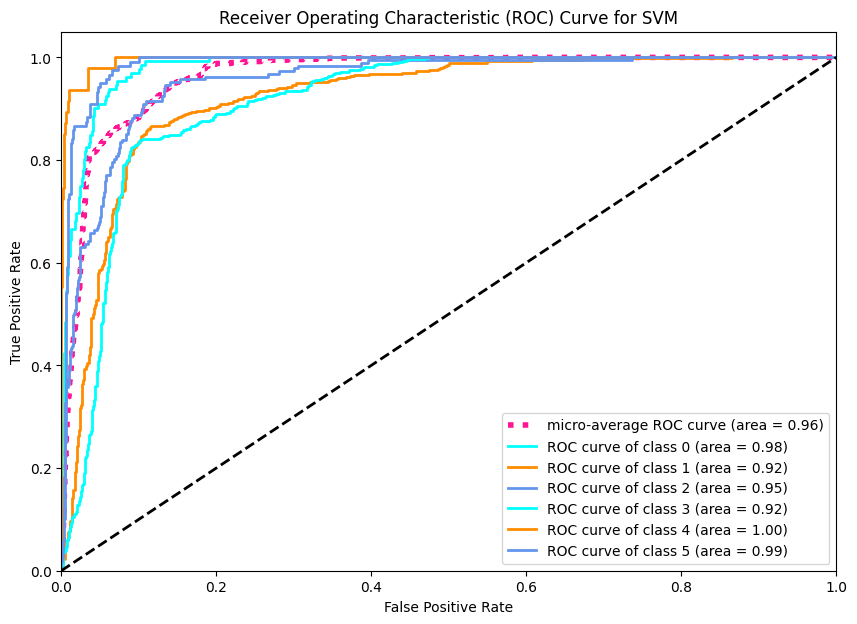

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
y_score = svm_model.decision_function(X_test)

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(10, 7))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()


### **KNN**

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
knn_best_model = grid_search.best_estimator_

# Train the best model
start_time = time.time()
knn_best_model.fit(X_train_scaled, y_train)
training_time_knn = time.time() - start_time

# Make predictions on the training set
y_train_pred_knn = knn_best_model.predict(X_train_scaled)

# Make predictions on the test set
start_time = time.time()
y_test_pred_knn = knn_best_model.predict(X_test_scaled)
prediction_time_knn = time.time() - start_time

# Evaluate the model on the training set
accuracy_knn_train = accuracy_score(y_train, y_train_pred_knn)
precision_knn_train, recall_knn_train, f1_knn_train, _ = precision_recall_fscore_support(y_train, y_train_pred_knn, average='weighted', zero_division=0)

# Evaluate the model on the test set
accuracy_knn_test = accuracy_score(y_test, y_test_pred_knn)
precision_knn_test, recall_knn_test, f1_knn_test, _ = precision_recall_fscore_support(y_test, y_test_pred_knn, average='weighted', zero_division=0)

print(f"Training Accuracy (KNN): {accuracy_knn_train:.4f}")
print(f"Training Precision (KNN): {precision_knn_train:.4f}")
print(f"Training Recall (KNN): {recall_knn_train:.4f}")
print(f"Training F1-score (KNN): {f1_knn_train:.4f}")

print(f"\nTest Accuracy (KNN): {accuracy_knn_test:.4f}")
print(f"Test Precision (KNN): {precision_knn_test:.4f}")
print(f"Test Recall (KNN): {recall_knn_test:.4f}")
print(f"Test F1-score (KNN): {f1_knn_test:.4f}")
print(f"Training Time (KNN): {training_time_knn:.4f} seconds")
print(f"Prediction Time (KNN): {prediction_time_knn:.4f} seconds")

# Classification report for the test set
print("\nClassification Report (KNN) - Test Set:")
print(classification_report(y_test, y_test_pred_knn, target_names=label_encoder.classes_))

Training Accuracy (KNN): 1.0000
Training Precision (KNN): 1.0000
Training Recall (KNN): 1.0000
Training F1-score (KNN): 1.0000

Test Accuracy (KNN): 0.7921
Test Precision (KNN): 0.7922
Test Recall (KNN): 0.7921
Test F1-score (KNN): 0.7906
Training Time (KNN): 0.0054 seconds
Prediction Time (KNN): 0.1349 seconds

Classification Report (KNN) - Test Set:
              precision    recall  f1-score   support

        Good       0.76      0.68      0.72       132
    Moderate       0.82      0.83      0.83       767
        Poor       0.68      0.62      0.65       187
Satisfactory       0.79      0.83      0.81       618
      Severe       0.93      0.57      0.71        47
   Very Poor       0.75      0.78      0.77       120

    accuracy                           0.79      1871
   macro avg       0.79      0.72      0.75      1871
weighted avg       0.79      0.79      0.79      1871



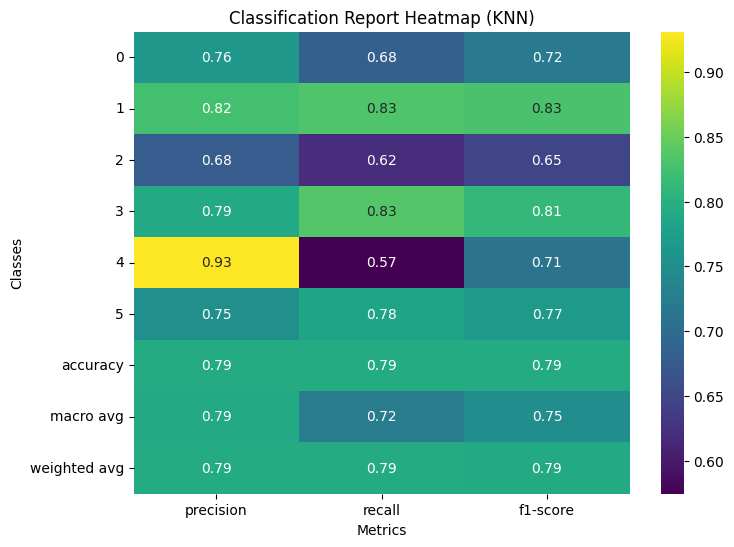

In [ ]:
report = classification_report(y_test, y_test_pred_knn, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report Heatmap (KNN)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


# **KNN model**

In [ ]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()
knn_model.fit(X_train, y_train)
end_time = time.time()
training_time_knn = end_time - start_time

In [ ]:
# Predict and evaluate on training set
start_pred_time = time.time()
y_train_pred_knn = knn_model.predict(X_train)
end_pred_time = time.time()
prediction_time_knn_train = end_pred_time - start_pred_time

accuracy_knn_train = accuracy_score(y_train, y_train_pred_knn)
precision_knn_train, recall_knn_train, f1_score_knn_train, _ = precision_recall_fscore_support(y_train, y_train_pred_knn, average='weighted', zero_division=0)

In [ ]:
# Predict and evaluate on test set
start_pred_time = time.time()
y_test_pred_knn = knn_model.predict(X_test)
end_pred_time = time.time()
prediction_time_knn_test = end_pred_time - start_pred_time

accuracy_knn_test = accuracy_score(y_test, y_test_pred_knn)
precision_knn_test, recall_knn_test, f1_score_knn_test, _ = precision_recall_fscore_support(y_test, y_test_pred_knn, average='weighted', zero_division=0)

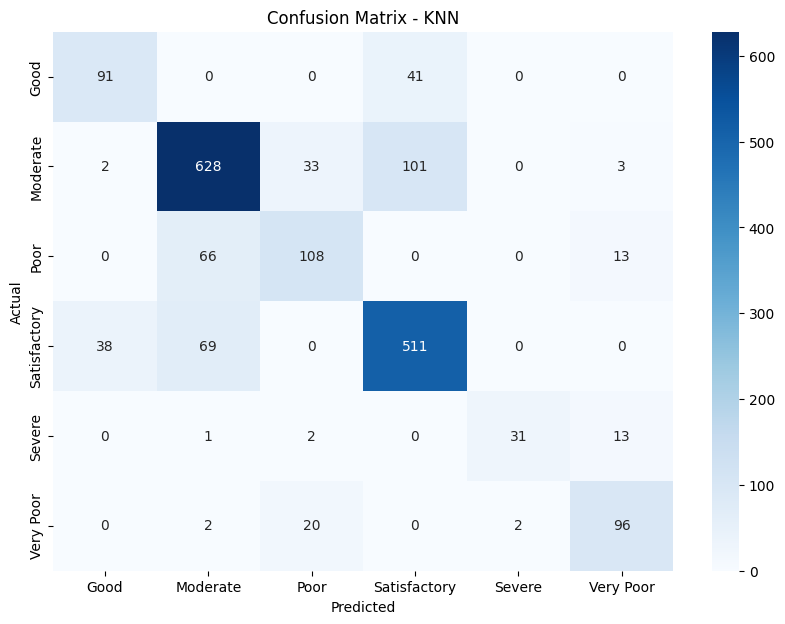

In [ ]:
# Confusion matrix for test set
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

In [ ]:
print(f"KNN (Training) - Accuracy: {accuracy_knn_train:.4f}, Precision: {precision_knn_train:.4f}, Recall: {recall_knn_train:.4f}, F1-score: {f1_score_knn_train:.4f}, Training Time: {training_time_knn:.4f} seconds, Prediction Time: {prediction_time_knn_train:.4f} seconds")
print(f"KNN (Testing) - Accuracy: {accuracy_knn_test:.4f}, Precision: {precision_knn_test:.4f}, Recall: {recall_knn_test:.4f}, F1-score: {f1_score_knn_test:.4f}, Prediction Time: {prediction_time_knn_test:.4f} seconds")

KNN (Training) - Accuracy: 0.8506, Precision: 0.8507, Recall: 0.8506, F1-score: 0.8504, Training Time: 0.0146 seconds, Prediction Time: 0.6263 seconds
KNN (Testing) - Accuracy: 0.7830, Precision: 0.7827, Recall: 0.7830, F1-score: 0.7817, Prediction Time: 0.3184 seconds


**KNN Hyper Tune For Increase accuracy**

In [ ]:
# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': range(1, 21)}  # Try different values of k
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best KNN model
best_knn_model = grid_search.best_estimator_

# Predict and evaluate on training set
start_time = time.time()
y_train_pred_best_knn = best_knn_model.predict(X_train)
end_time = time.time()
prediction_time_best_knn_train = end_time - start_time

accuracy_best_knn_train = accuracy_score(y_train, y_train_pred_best_knn)
precision_best_knn_train, recall_best_knn_train, f1_score_best_knn_train, _ = precision_recall_fscore_support(y_train, y_train_pred_best_knn, average='weighted', zero_division=0)

# Predict and evaluate on test set
start_time = time.time()
y_test_pred_best_knn = best_knn_model.predict(X_test)
end_time = time.time()
prediction_time_best_knn_test = end_time - start_time

accuracy_best_knn_test = accuracy_score(y_test, y_test_pred_best_knn)
precision_best_knn_test, recall_best_knn_test, f1_score_best_knn_test, _ = precision_recall_fscore_support(y_test, y_test_pred_best_knn, average='weighted', zero_division=0)

# Print results
print(f"Best KNN (Training) - Accuracy: {accuracy_best_knn_train:.4f}, Precision: {precision_best_knn_train:.4f}, Recall: {recall_best_knn_train:.4f}, F1-score: {f1_score_best_knn_train:.4f}, Prediction Time: {prediction_time_best_knn_train:.4f} seconds")
print(f"Best KNN (Testing) - Accuracy: {accuracy_best_knn_test:.4f}, Precision: {precision_best_knn_test:.4f}, Recall: {recall_best_knn_test:.4f}, F1-score: {f1_score_best_knn_test:.4f}, Prediction Time: {prediction_time_best_knn_test:.4f} seconds")


Best KNN (Training) - Accuracy: 0.8334, Precision: 0.8339, Recall: 0.8334, F1-score: 0.8332, Prediction Time: 0.4246 seconds
Best KNN (Testing) - Accuracy: 0.7771, Precision: 0.7767, Recall: 0.7771, F1-score: 0.7751, Prediction Time: 0.1844 seconds


**Try a different distance metric**

In [ ]:
# Try a different distance metric
knn_model_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
start_time = time.time()
knn_model_manhattan.fit(X_train, y_train)
end_time = time.time()
training_time_knn_manhattan = end_time - start_time

# Predict and evaluate on training set
start_pred_time = time.time()
y_train_pred_knn_manhattan = knn_model_manhattan.predict(X_train)
end_pred_time = time.time()
prediction_time_knn_manhattan_train = end_pred_time - start_pred_time

accuracy_knn_manhattan_train = accuracy_score(y_train, y_train_pred_knn_manhattan)
precision_knn_manhattan_train, recall_knn_manhattan_train, f1_score_knn_manhattan_train, _ = precision_recall_fscore_support(y_train, y_train_pred_knn_manhattan, average='weighted', zero_division=0)

# Predict and evaluate on test set
start_pred_time = time.time()
y_test_pred_knn_manhattan = knn_model_manhattan.predict(X_test)
end_pred_time = time.time()
prediction_time_knn_manhattan_test = end_pred_time - start_pred_time

accuracy_knn_manhattan_test = accuracy_score(y_test, y_test_pred_knn_manhattan)
precision_knn_manhattan_test, recall_knn_manhattan_test, f1_score_knn_manhattan_test, _ = precision_recall_fscore_support(y_test, y_test_pred_knn_manhattan, average='weighted', zero_division=0)

print(f"KNN (Manhattan, Training) - Accuracy: {accuracy_knn_manhattan_train:.4f}, Precision: {precision_knn_manhattan_train:.4f}, Recall: {recall_knn_manhattan_train:.4f}, F1-score: {f1_score_knn_manhattan_train:.4f}, Training Time: {training_time_knn_manhattan:.4f} seconds, Prediction Time: {prediction_time_knn_manhattan_train:.4f} seconds")
print(f"KNN (Manhattan, Testing) - Accuracy: {accuracy_knn_manhattan_test:.4f}, Precision: {precision_knn_manhattan_test:.4f}, Recall: {recall_knn_manhattan_test:.4f}, F1-score: {f1_score_knn_manhattan_test:.4f}, Prediction Time: {prediction_time_knn_manhattan_test:.4f} seconds")

# More extensive hyperparameter tuning
param_grid = {
    'n_neighbors': range(1, 31),  # Wider range of k
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best KNN model
best_knn_model_extensive = grid_search.best_estimator_

# Predict and evaluate on training set
y_train_pred_best_knn_extensive = best_knn_model_extensive.predict(X_train)
accuracy_best_knn_extensive_train = accuracy_score(y_train, y_train_pred_best_knn_extensive)
precision_best_knn_extensive_train, recall_best_knn_extensive_train, f1_score_best_knn_extensive_train, _ = precision_recall_fscore_support(y_train, y_train_pred_best_knn_extensive, average='weighted', zero_division=0)

# Predict and evaluate on test set
y_test_pred_best_knn_extensive = best_knn_model_extensive.predict(X_test)
accuracy_best_knn_extensive_test = accuracy_score(y_test, y_test_pred_best_knn_extensive)
precision_best_knn_extensive_test, recall_best_knn_extensive_test, f1_score_best_knn_extensive_test, _ = precision_recall_fscore_support(y_test, y_test_pred_best_knn_extensive, average='weighted', zero_division=0)

print(f"Best KNN (Extensive Tuning, Training) - Accuracy: {accuracy_best_knn_extensive_train:.4f}, Precision: {precision_best_knn_extensive_train:.4f}, Recall: {recall_best_knn_extensive_train:.4f}, F1-score: {f1_score_best_knn_extensive_train:.4f}")
print(f"Best KNN (Extensive Tuning, Testing) - Accuracy: {accuracy_best_knn_extensive_test:.4f}, Precision: {precision_best_knn_extensive_test:.4f}, Recall: {recall_best_knn_extensive_test:.4f}, F1-score: {f1_score_best_knn_extensive_test:.4f}")


KNN (Manhattan, Training) - Accuracy: 0.8532, Precision: 0.8533, Recall: 0.8532, F1-score: 0.8529, Training Time: 0.0080 seconds, Prediction Time: 0.5817 seconds
KNN (Manhattan, Testing) - Accuracy: 0.7958, Precision: 0.7953, Recall: 0.7958, F1-score: 0.7939, Prediction Time: 0.2421 seconds
Best KNN (Extensive Tuning, Training) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Best KNN (Extensive Tuning, Testing) - Accuracy: 0.7883, Precision: 0.7882, Recall: 0.7883, F1-score: 0.7855


# **Gaussian Naive Bayes (GNB)**

In [ ]:
# Train Gaussian Naive Bayes model
gnb_model = GaussianNB(var_smoothing=1e-8)
start_time = time.time()
gnb_model.fit(X_train_scaled, y_train)
end_time = time.time()
training_time_gnb = end_time - start_time

In [ ]:
# Predict and evaluate on training set
start_pred_time = time.time()
y_train_pred_gnb = gnb_model.predict(X_train)
end_pred_time = time.time()
prediction_time_gnb_train = end_pred_time - start_pred_time

accuracy_gnb_train = accuracy_score(y_train, y_train_pred_gnb)
precision_gnb_train, recall_gnb_train, f1_score_gnb_train, _ = precision_recall_fscore_support(y_train, y_train_pred_gnb, average='weighted', zero_division=0)

In [ ]:
# Predict and evaluate on test set
start_pred_time = time.time()
y_test_pred_gnb = gnb_model.predict(X_test)
end_pred_time = time.time()
prediction_time_gnb_test = end_pred_time - start_pred_time

accuracy_gnb_test = accuracy_score(y_test, y_test_pred_gnb)
precision_gnb_test, recall_gnb_test, f1_score_gnb_test, _ = precision_recall_fscore_support(y_test, y_test_pred_gnb, average='weighted', zero_division=0)


In [ ]:
print(classification_report(y_test, y_test_pred_gnb))


              precision    recall  f1-score   support

           0       0.55      0.86      0.67       132
           1       0.81      0.73      0.77       767
           2       0.59      0.55      0.57       187
           3       0.73      0.75      0.74       618
           4       0.71      0.85      0.78        47
           5       0.73      0.69      0.71       120

    accuracy                           0.73      1871
   macro avg       0.69      0.74      0.70      1871
weighted avg       0.74      0.73      0.73      1871



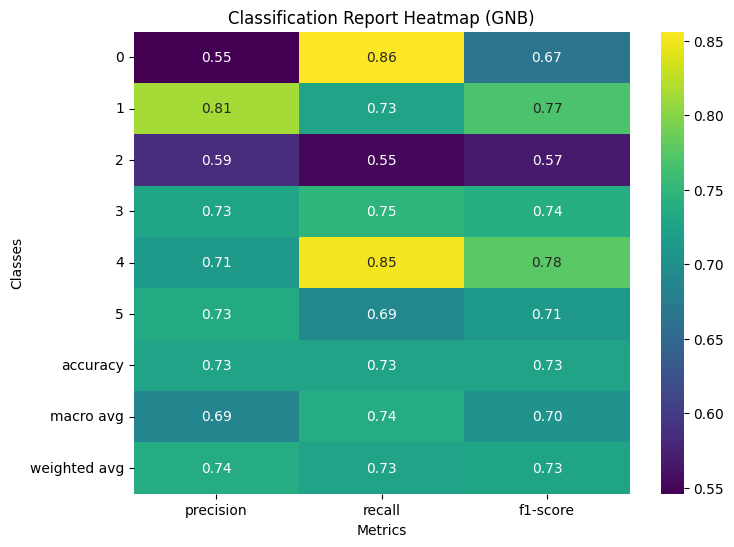

In [ ]:

report = classification_report(y_test, y_test_pred_gnb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report Heatmap (GNB)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


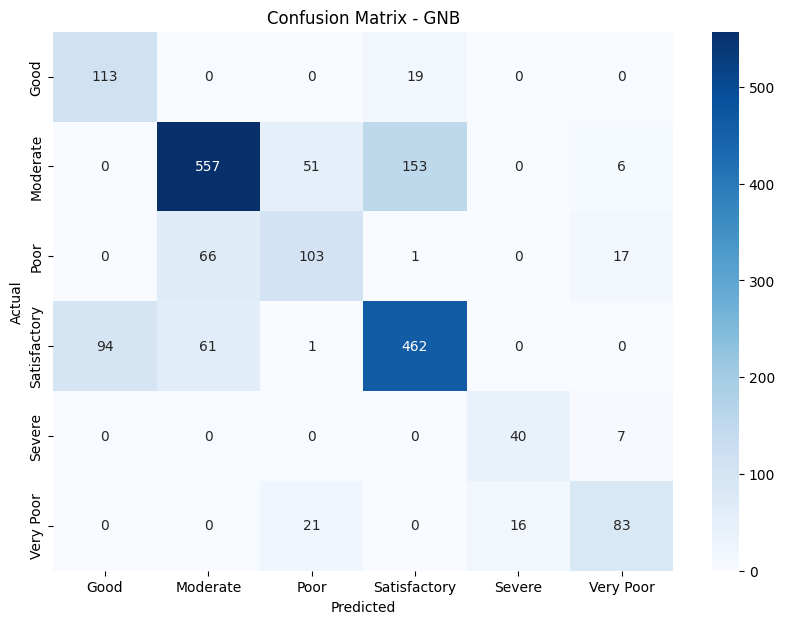

In [ ]:
# Confusion matrix for test set
conf_matrix_gnb = confusion_matrix(y_test, y_test_pred_gnb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GNB')
plt.show()

In [ ]:
print(f"GNB (Training) - Accuracy: {accuracy_gnb_train:.4f}, Precision: {precision_gnb_train:.4f}, Recall: {recall_gnb_train:.4f}, F1-score: {f1_score_gnb_train:.4f}, Training Time: {training_time_gnb:.4f} seconds, Prediction Time: {prediction_time_gnb_train:.4f} seconds")
print(f"GNB (Testing) - Accuracy: {accuracy_gnb_test:.4f}, Precision: {precision_gnb_test:.4f}, Recall: {recall_gnb_test:.4f}, F1-score: {f1_score_gnb_test:.4f}, Prediction Time: {prediction_time_gnb_test:.4f} seconds")

GNB (Training) - Accuracy: 0.7368, Precision: 0.7504, Recall: 0.7368, F1-score: 0.7388, Training Time: 0.0053 seconds, Prediction Time: 0.0174 seconds
GNB (Testing) - Accuracy: 0.7258, Precision: 0.7362, Recall: 0.7258, F1-score: 0.7273, Prediction Time: 0.0040 seconds


# **Random Forest Classifier**

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
training_time_rf = end_time - start_time

In [ ]:
# Predict and evaluate on training set
start_pred_time = time.time()
y_train_pred_rf = rf_model.predict(X_train)
end_pred_time = time.time()
prediction_time_rf_train = end_pred_time - start_pred_time

accuracy_rf_train = accuracy_score(y_train, y_train_pred_rf)
precision_rf_train, recall_rf_train, f1_score_rf_train, _ = precision_recall_fscore_support(y_train, y_train_pred_rf, average='weighted', zero_division=0)

In [ ]:
# Predict and evaluate on test set
start_pred_time = time.time()
y_test_pred_rf = rf_model.predict(X_test)
end_pred_time = time.time()
prediction_time_rf_test = end_pred_time - start_pred_time

accuracy_rf_test = accuracy_score(y_test, y_test_pred_rf)
precision_rf_test, recall_rf_test, f1_score_rf_test, _ = precision_recall_fscore_support(y_test, y_test_pred_rf, average='weighted', zero_division=0)



In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       132
           1       0.85      0.87      0.86       767
           2       0.75      0.72      0.74       187
           3       0.83      0.85      0.84       618
           4       0.91      0.66      0.77        47
           5       0.79      0.82      0.80       120

    accuracy                           0.83      1871
   macro avg       0.83      0.77      0.80      1871
weighted avg       0.83      0.83      0.83      1871



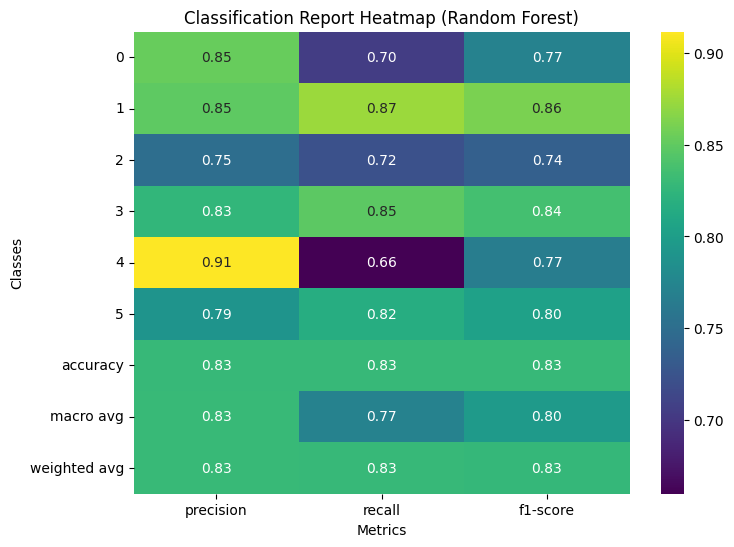

In [ ]:

report = classification_report(y_test, y_test_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report Heatmap (Random Forest)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


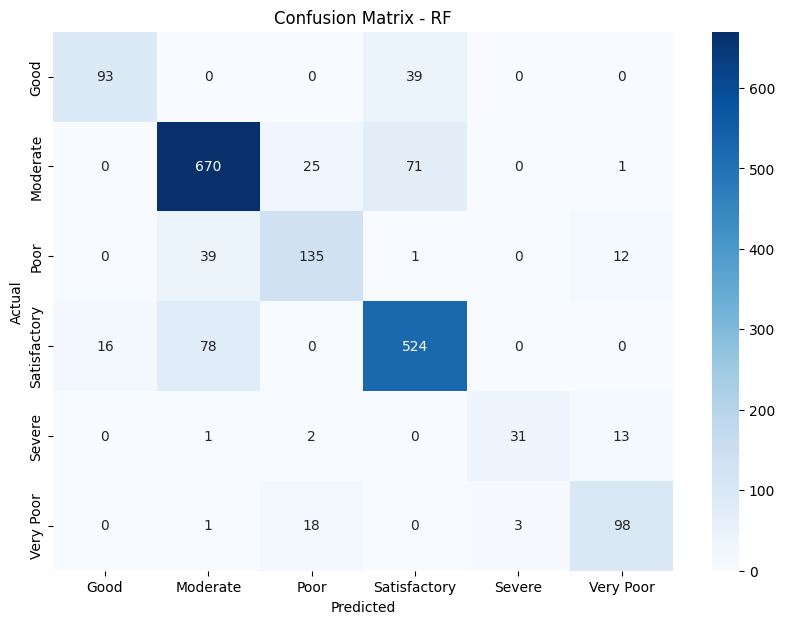

In [ ]:
# Confusion matrix for test set
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RF')
plt.show()

In [ ]:
print(f"RF (Training) - Accuracy: {accuracy_rf_train:.4f}, Precision: {precision_rf_train:.4f}, Recall: {recall_rf_train:.4f}, F1-score: {f1_score_rf_train:.4f}, Training Time: {training_time_rf:.4f} seconds, Prediction Time: {prediction_time_rf_train:.4f} seconds")
print(f"RF (Testing) - Accuracy: {accuracy_rf_test:.4f}, Precision: {precision_rf_test:.4f}, Recall: {recall_rf_test:.4f}, F1-score: {f1_score_rf_test:.4f}, Prediction Time: {prediction_time_rf_test:.4f} seconds")

RF (Training) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000, Training Time: 1.5376 seconds, Prediction Time: 0.0766 seconds
RF (Testing) - Accuracy: 0.8290, Precision: 0.8294, Recall: 0.8290, F1-score: 0.8280, Prediction Time: 0.0554 seconds


# **XGBoost Classifier**

In [ ]:
# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
training_time_xgb = end_time - start_time

In [ ]:
# Predict and evaluate on training set
start_pred_time = time.time()
y_train_pred_xgb = xgb_model.predict(X_train)
end_pred_time = time.time()
prediction_time_xgb_train = end_pred_time - start_pred_time

accuracy_xgb_train = accuracy_score(y_train, y_train_pred_xgb)
precision_xgb_train, recall_xgb_train, f1_score_xgb_train, _ = precision_recall_fscore_support(y_train, y_train_pred_xgb, average='weighted', zero_division=0)

In [ ]:
# Predict and evaluate on test set
start_pred_time = time.time()
y_test_pred_xgb = xgb_model.predict(X_test)
end_pred_time = time.time()
prediction_time_xgb_test = end_pred_time - start_pred_time

accuracy_xgb_test = accuracy_score(y_test, y_test_pred_xgb)
precision_xgb_test, recall_xgb_test, f1_score_xgb_test, _ = precision_recall_fscore_support(y_test, y_test_pred_xgb, average='weighted', zero_division=0)



In [ ]:
print(classification_report(y_test, y_test_pred_xgb))


              precision    recall  f1-score   support

           0       0.83      0.73      0.77       132
           1       0.85      0.88      0.87       767
           2       0.74      0.68      0.71       187
           3       0.84      0.85      0.84       618
           4       0.89      0.72      0.80        47
           5       0.80      0.79      0.79       120

    accuracy                           0.83      1871
   macro avg       0.82      0.78      0.80      1871
weighted avg       0.83      0.83      0.83      1871



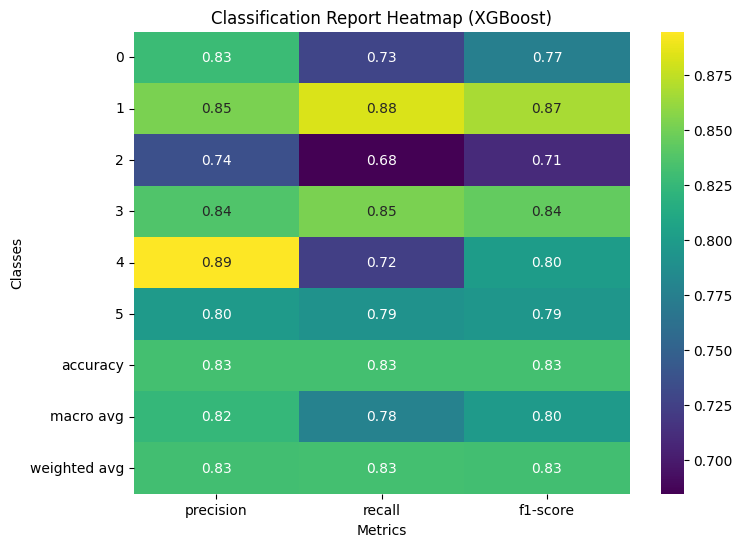

In [ ]:

report = classification_report(y_test, y_test_pred_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report Heatmap (XGBoost)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


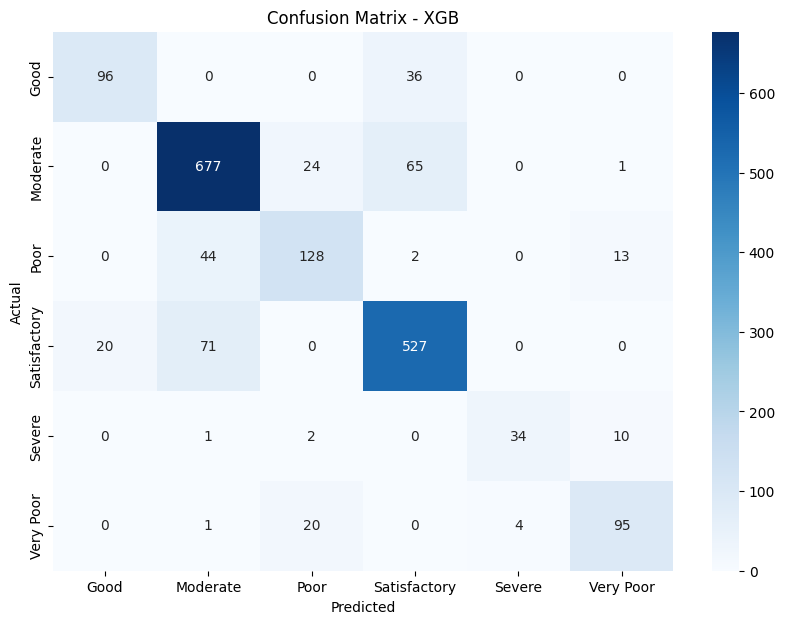

In [ ]:
# Confusion matrix for test set
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGB')
plt.show()

In [ ]:
print(f"XGB (Training) - Accuracy: {accuracy_xgb_train:.4f}, Precision: {precision_xgb_train:.4f}, Recall: {recall_xgb_train:.4f}, F1-score: {f1_score_xgb_train:.4f}, Training Time: {training_time_xgb:.4f} seconds, Prediction Time: {prediction_time_xgb_train:.4f} seconds")
print(f"XGB (Testing) - Accuracy: {accuracy_xgb_test:.4f}, Precision: {precision_xgb_test:.4f}, Recall: {recall_xgb_test:.4f}, F1-score: {f1_score_xgb_test:.4f}, Prediction Time: {prediction_time_xgb_test:.4f} seconds")

XGB (Training) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000, Training Time: 6.7054 seconds, Prediction Time: 0.1001 seconds
XGB (Testing) - Accuracy: 0.8322, Precision: 0.8314, Recall: 0.8322, F1-score: 0.8311, Prediction Time: 0.0842 seconds


# **Comparison Table**

In [ ]:
# Data for the table
models = ['SVM', 'KNN', 'Best KNN', 'KNN (Manhattan)', 'Best KNN (Extensive)', 'GNB', 'Random Forest', 'XGBoost']
train_accuracy = [accuracy_svm_train, accuracy_knn_train, accuracy_best_knn_train, accuracy_knn_manhattan_train, accuracy_best_knn_extensive_train, accuracy_gnb_train, accuracy_rf_train, accuracy_xgb_train]
test_accuracy = [accuracy_svm_test, accuracy_knn_test, accuracy_best_knn_test, accuracy_knn_manhattan_test, accuracy_best_knn_extensive_test, accuracy_gnb_test, accuracy_rf_test, accuracy_xgb_test]
train_precision = [precision_svm_train, precision_knn_train, precision_best_knn_train, precision_knn_manhattan_train, precision_best_knn_extensive_train, precision_gnb_train, precision_rf_train, precision_xgb_train]
test_precision = [precision_svm_test, precision_knn_test, precision_best_knn_test, precision_knn_manhattan_test, precision_best_knn_extensive_test, precision_gnb_test, precision_rf_test, precision_xgb_test]
train_recall = [recall_svm_train, recall_knn_train, recall_best_knn_train, recall_knn_manhattan_train, recall_best_knn_extensive_train, recall_gnb_train, recall_rf_train, recall_xgb_train]
test_recall = [recall_svm_test, recall_knn_test, recall_best_knn_test, recall_knn_manhattan_test, recall_best_knn_extensive_test, recall_gnb_test, recall_rf_test, recall_xgb_test]
train_f1 = [f1_score_svm_train, f1_knn_train, f1_score_best_knn_train, f1_score_knn_manhattan_train, f1_score_best_knn_extensive_train, f1_score_gnb_train, f1_score_rf_train, f1_score_xgb_train]
test_f1 = [f1_score_svm_test, f1_knn_test, f1_score_best_knn_test, f1_score_knn_manhattan_test, f1_score_best_knn_extensive_test, f1_score_gnb_test, f1_score_rf_test, f1_score_xgb_test]

# Create a pandas DataFrame
df = pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'Train Precision': train_precision,
    'Test Precision': test_precision,
    'Train Recall': train_recall,
    'Test Recall': test_recall,
    'Train F1-score': train_f1,
    'Test F1-score': test_f1
})

# Display the table
print(df)


                  Model  Train Accuracy  Test Accuracy  Train Precision  \
0                   SVM        0.816724       0.812934         0.816592   
1                   KNN        0.850630       0.783004         0.850695   
2              Best KNN        0.833448       0.777125         0.833862   
3       KNN (Manhattan)        0.853150       0.795831         0.853321   
4  Best KNN (Extensive)        1.000000       0.788348         1.000000   
5                   GNB        0.736770       0.725815         0.750437   
6         Random Forest        1.000000       0.828968         1.000000   
7               XGBoost        1.000000       0.832175         1.000000   

   Test Precision  Train Recall  Test Recall  Train F1-score  Test F1-score  
0        0.811822      0.816724     0.812934        0.816526       0.811187  
1        0.782650      0.850630     0.783004        1.000000       0.790581  
2        0.776721      0.833448     0.777125        0.833188       0.775144  
3        0.7

## **Visualizations**

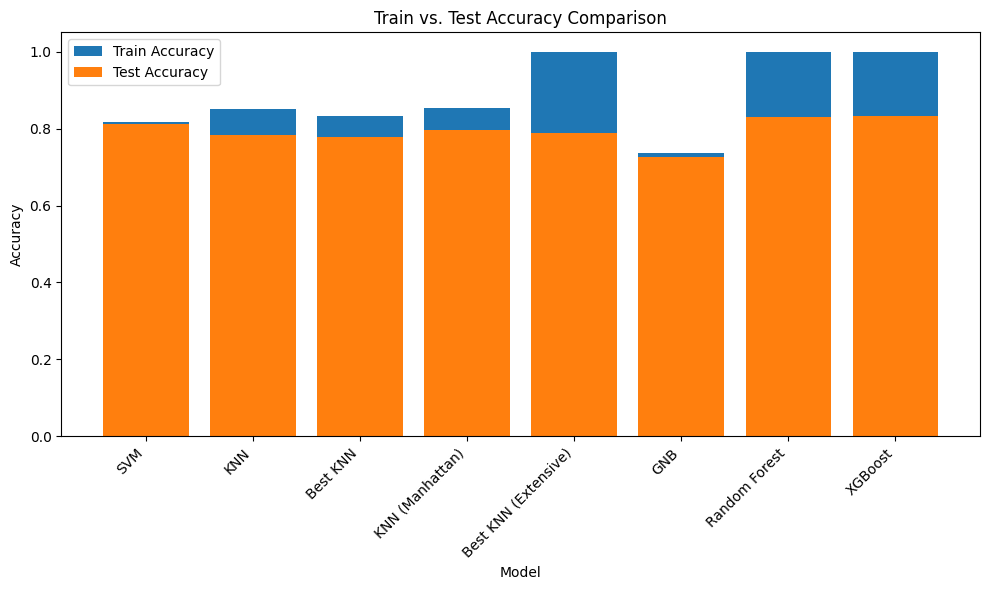

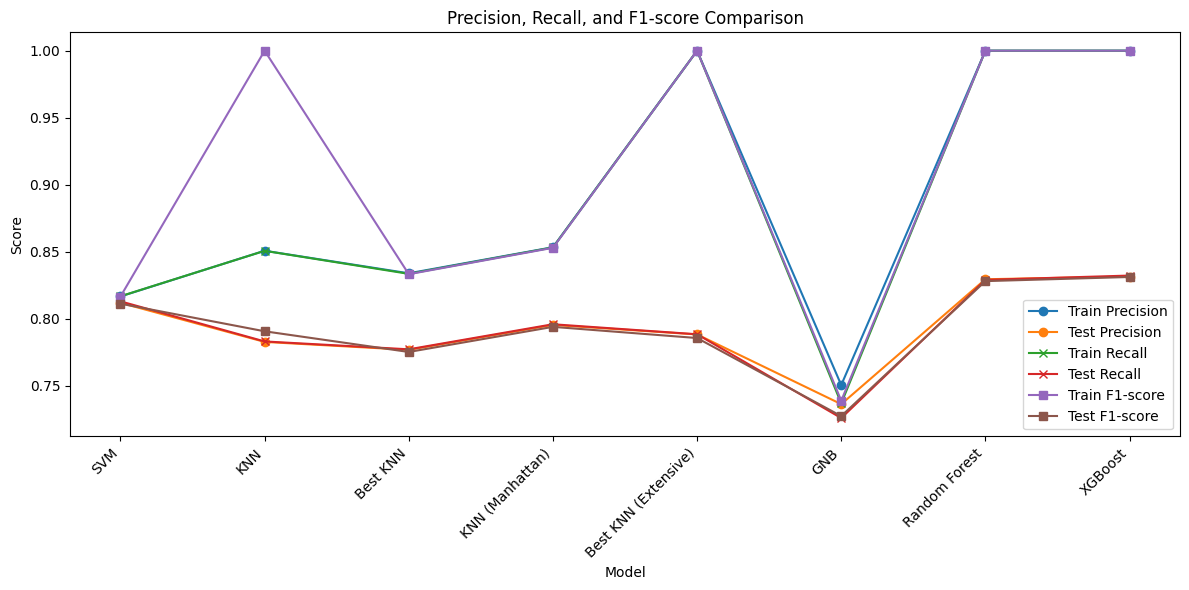

In [ ]:
# Visualizations
# Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracy, label='Train Accuracy')
plt.bar(models, test_accuracy, label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train vs. Test Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#Precision, Recall, and F1-score Comparison
plt.figure(figsize=(12, 6))
plt.plot(models, train_precision, marker='o', label='Train Precision')
plt.plot(models, test_precision, marker='o', label='Test Precision')
plt.plot(models, train_recall, marker='x', label='Train Recall')
plt.plot(models, test_recall, marker='x', label='Test Recall')
plt.plot(models, train_f1, marker='s', label='Train F1-score')
plt.plot(models, test_f1, marker='s', label='Test F1-score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# **Explainable Ai**

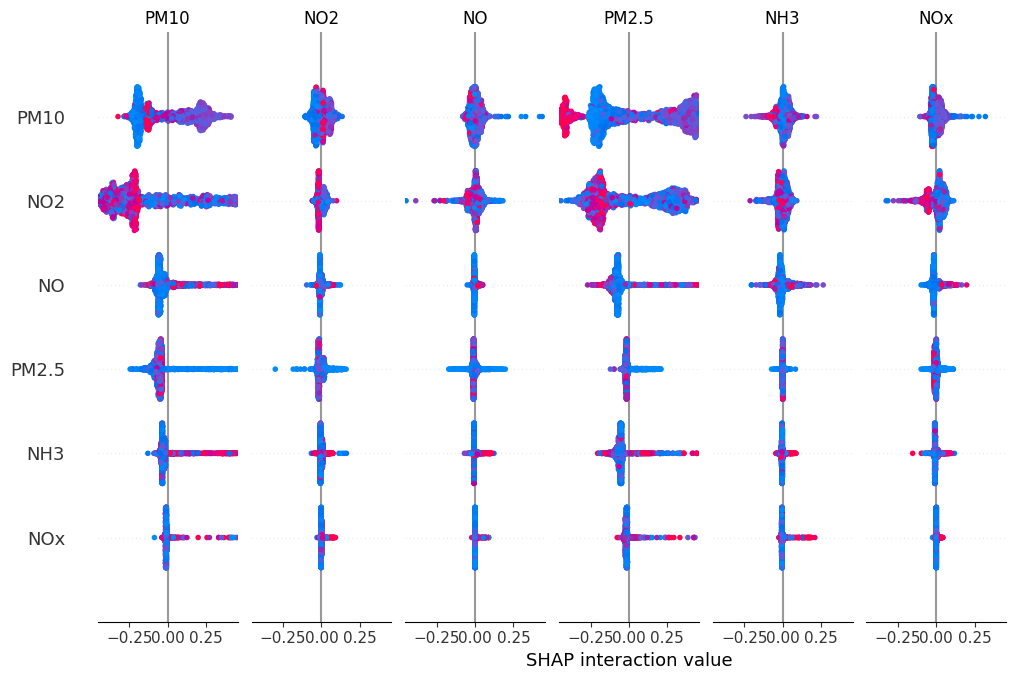

In [ ]:
!pip install shap

import shap

# Create an explainer object
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


**Lime**

In [ ]:
!pip install lime

from lime import lime_tabular

# Create a LimeTabularExplainer object
explainer = lime_tabular.LimeTabularExplainer(
    X_train,  # Pass the NumPy array directly
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    mode="classification"
)

# Choose an instance to explain
i = 10  # Example index
exp = explainer.explain_instance(
    X_test[i], # Use array indexing instead of .iloc
    rf_model.predict_proba,
    num_features=5
)

# Display the explanation
exp.show_in_notebook()

# **KFOLD AND CROSSVAlIDATION**


**KFOLD AND CROSSVAlIDATION SVM**

In [ ]:
# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create an SVM model
svm_model = SVC()

# Perform cross-validation
scores = cross_val_score(svm_model, X, y, cv=kf)

# Print the cross-validation scores
print("SVM Cross-validation scores:", scores)
print("SVM Average cross-validation score:", scores.mean())


SVM Cross-validation scores: [0.80208333 0.81876504 0.79631115 0.7914996  0.81956696]
SVM Average cross-validation score: 0.8056452151831062


**KFOLD AND CROSSVAlIDATION KNN**

In [ ]:
# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create a KNN model
knn_model = KNeighborsClassifier()

# Perform cross-validation
scores = cross_val_score(knn_model, X, y, cv=kf)

# Print the cross-validation scores
print("KNN Cross-validation scores:", scores)
print("KNN Average cross-validation score:", scores.mean())


KNN Cross-validation scores: [0.80448718 0.80272654 0.80914194 0.79631115 0.80593424]
KNN Average cross-validation score: 0.8037202105566179


**KFOLD AND CROSSVAlIDATION GNB**


In [ ]:
# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create a GNB model
gnb_model = GaussianNB()

# Perform cross-validation
scores = cross_val_score(gnb_model, X, y, cv=kf)

# Print the cross-validation scores
print("GNB Cross-validation scores:", scores)
print("GNB Average cross-validation score:", scores.mean())


GNB Cross-validation scores: [0.72596154 0.7393745  0.7425822  0.7265437  0.72894948]
GNB Average cross-validation score: 0.7326822836345691


 **KFOLD AND CROSSVAlIDATION RF**

In [ ]:
# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create a RF model
rf_model = RandomForestClassifier()

# Perform cross-validation
scores = cross_val_score(rf_model, X, y, cv=kf)

# Print the cross-validation scores
print("RF Cross-validation scores:", scores)
print("RF Average cross-validation score:", scores.mean())


RF Cross-validation scores: [0.82932692 0.8340016  0.82437851 0.81074579 0.82999198]
RF Average cross-validation score: 0.8256889611991858


**KFOLD AND CROSSVAlIDATION XGBOOST**

In [ ]:
# Assuming 'y' is your target variable with string labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode string labels to numerical labels

# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Create an XGBoost model
xgb_model = XGBClassifier()

# Perform cross-validation using the encoded target variable
scores = cross_val_score(xgb_model, X, y_encoded, cv=kf)  # Use y_encoded

# Print the cross-validation scores
print("XGBoost Cross-validation scores:", scores)
print("XGBoost Average cross-validation score:", scores.mean())

XGBoost Cross-validation scores: [0.82932692 0.82999198 0.82197273 0.81234964 0.82036889]
XGBoost Average cross-validation score: 0.8228020325704769


**COMPARISON TABLE**

In [ ]:
# Data for the table
models = ['SVM', 'KNN', 'GNB', 'Random Forest', 'XGBoost']
cross_val_scores = [scores.mean() for scores in [
    cross_val_score(SVC(), X, y, cv=kf),
    cross_val_score(KNeighborsClassifier(), X, y, cv=kf),
    cross_val_score(GaussianNB(), X, y, cv=kf),
    cross_val_score(RandomForestClassifier(), X, y, cv=kf),
    cross_val_score(XGBClassifier(), X, y_encoded, cv=kf)  # Using encoded y for XGBoost
]]

# Create a pandas DataFrame
df_cross_val = pd.DataFrame({
    'Model': models,
    'Cross-Validation Score': cross_val_scores
})

# Display the table
print(df_cross_val)


           Model  Cross-Validation Score
0            SVM                0.805645
1            KNN                0.803720
2            GNB                0.732682
3  Random Forest                0.828095
4        XGBoost                0.822802
